<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Capstone Part 10:** Exploratory Data Analysis


#### Student Author: Abigail Hedden

## Objectives


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Set-up


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# display all columns
pd.set_option('display.max_columns', None)

# preview
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [96]:
# preview data
df.describe

<bound method NDFrame.describe of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employ

In [97]:
df.info

<bound method DataFrame.info of        ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed

In [98]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'ExperienceRange'],
      dtype='object', length=115)

## Handle Missing Data
Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [27]:
df.shape

(65437, 114)

In [165]:
critical_cols = ['Employment', 'JobSat', 'RemoteWork']
print('number of null rows')
print(df[critical_cols].isnull().sum())
# there are no null employment values

# the number of rows where JobSat is missing is over half of the dataset
# why is it missing?

# create a mask where JobSat is null
missing_mask = df['JobSat'].isnull()
print('')
print(df[missing_mask].Employment.value_counts())
print(df[missing_mask].YearsCodePro.describe())

# examine the types of employment associated with present and missing JobSat data
print('')
print("Employment distribution (JobSat missing):")
print(df.loc[missing_mask, 'Employment'].value_counts(normalize=True).head(10))
# most missing JobSat data came from people who are students, part-time workers, or unemployed
print('')
print("\nEmployment distribution (JobSat present):")
print(df.loc[~missing_mask, 'Employment'].value_counts(normalize=True).head(10))
# most present JobSat data came from people who are employed full time (77%) 

# insight: People who skipped the JobSat question are disproportionately students, unemployed, or not full-time.
# dropping all null rows would bias the analyses heavily toward full-time employees.
# solution: replace null values with "missing", to easily use in later analyses

df_nonull = df.copy()

df_nonull['JobSat'] = df_nonull['JobSat'].fillna('Missing')

# fill missing RemoteWork data with "Unknown"
df_nonull['RemoteWork'] = df_nonull['RemoteWork'].fillna('Unknown')

# ensure no null values
print('')
print(df_nonull[critical_cols].isnull().sum())

number of null rows
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Employed, full-time                                                                                                                                                              16504
Student, full-time                                                                                                                                                                4709
Independent contractor, freelancer, or self-employed                                                                                                                              3601
Not employed, but looking for work                                                                                                                                                2340
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                      

In [29]:
# confirm preserved rows
print(df.shape)
print(df_nonull.shape)

(65437, 114)
(65437, 114)


In [99]:
# calculate the value counts for each column to understand the distribution of responses
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print()


Value counts for column: ResponseId
2049     1
32101    1
38200    1
40249    1
34106    1
        ..
8849     1
14994    1
12947    1
2708     1
2047     1
Name: ResponseId, Length: 65437, dtype: int64

Value counts for column: MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: MainBranch, dtype: int64

Value counts for column: Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322


## Job Satisfaction Exploratory Analyses

### Visualize Job Satisfaction Distribution
- Create a pie chart or KDE plot to visualize the distribution of `JobSat`
- Provide an interpretation of the plot, highlighting key trends in job satisfaction


JobSat distribution:
 0.0      311
1.0      276
2.0      772
3.0     1165
4.0     1130
5.0     1956
6.0     3751
7.0     6379
8.0     7509
9.0     3626
10.0    2251
Name: JobSat, dtype: int64


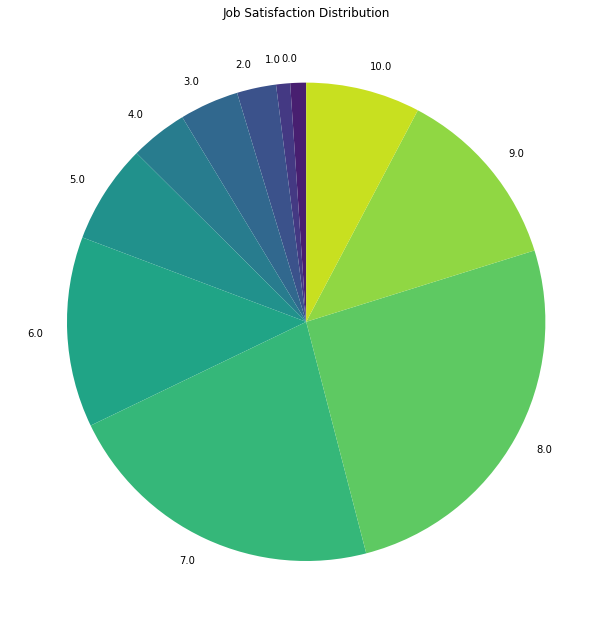

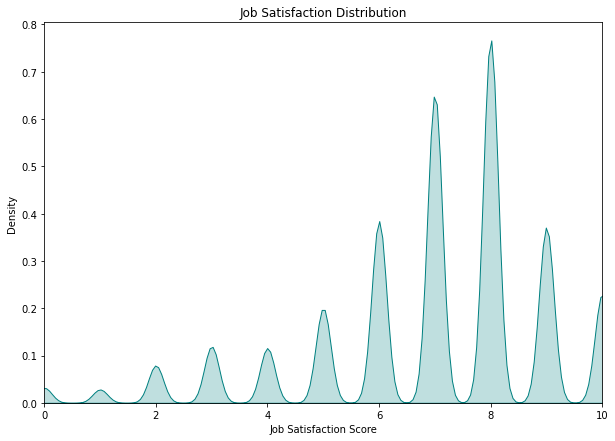

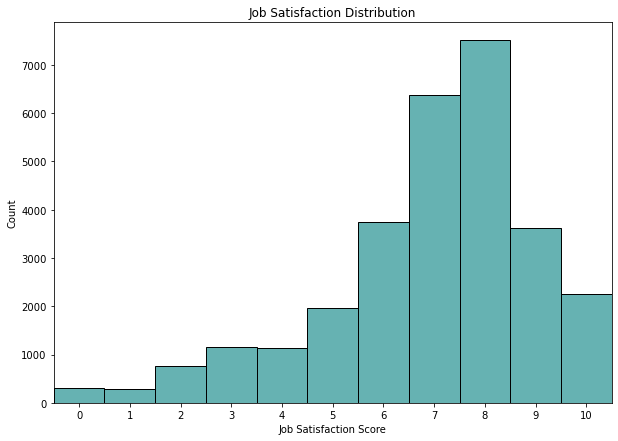

In [138]:
jobsat_counts = df_nonull[df_nonull['JobSat'] != 'Missing']['JobSat'].value_counts()
jobsat_counts = jobsat_counts.sort_index()

print("\nJobSat distribution:\n", jobsat_counts)

# pie chart
colors = sns.color_palette("viridis", n_colors=len(jobsat_counts))
plt.figure(figsize=(11, 11))

jobsat_counts.plot.pie(startangle=90,colors=colors)
plt.title("Job Satisfaction Distribution")
plt.ylabel("")
plt.show()

# KDE plot
jobsat_numeric = pd.to_numeric(df_nonull.loc[df_nonull['JobSat'] != 'Missing', 'JobSat'], errors='coerce').dropna()

plt.figure(figsize=(10, 7))
sns.kdeplot(jobsat_numeric, fill=True, color='teal', bw_adjust=0.5)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.xlim(0,10)   
plt.show()

# alternatively, histogram (I like it better personally)
plt.figure(figsize=(10, 7))
bin_edges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5] # manually set bin edges so that it centers with satisfaction values
sns.histplot(jobsat_numeric, bins=bin_edges, kde=False, color='teal', edgecolor='black', alpha=0.6)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Count")
plt.xlim(-0.5,10.5)     
plt.xticks(range(11))
plt.show()


### Analysis of Experience and Job Satisfaction


* Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). 
* Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.


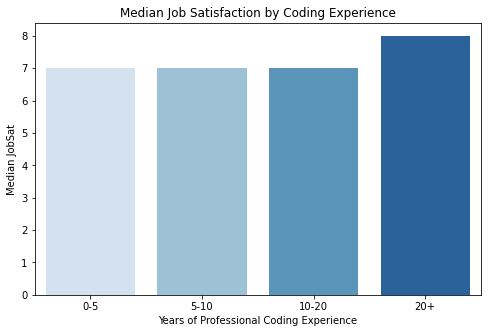

In [51]:
### create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# calculate the median `JobSat` for each range
job_sat_by_exp = df.groupby('ExperienceRange')['JobSat'].median().reset_index()

# visualize the relationship using a bar plot or similar visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=job_sat_by_exp, x='ExperienceRange', y='JobSat', palette='Blues')
plt.title('Median Job Satisfaction by Coding Experience')
plt.ylabel('Median JobSat')
plt.xlabel('Years of Professional Coding Experience')
plt.show()

# people with 20+ years of coding experience have the highest median level of job satisfaction

### Correlation Between Experience and Job Satisfaction
Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.

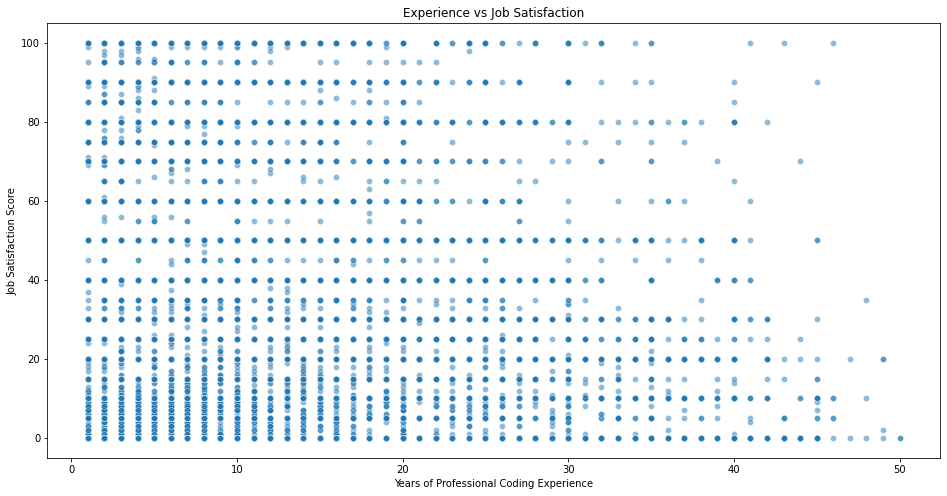

In [193]:
# replace special cases to keep experience as a continuous variable for scatterplot
df_nonull['YearsCodePro_num'] = df_nonull['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})
# make numeric
df_nonull['JobSatPoints_1'] = pd.to_numeric(df_nonull['JobSatPoints_1'], errors='coerce')
df_nonull['YearsCodePro_num'] = pd.to_numeric(df_nonull['YearsCodePro_num'], errors='coerce')


plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_nonull,
    x='YearsCodePro_num',
    y='JobSatPoints_1',
    alpha=0.5
)
plt.title('Experience vs Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.show()

# seemingly no relationship

## Industry Exploratory Analyses

### Visualize Job Industry Distribution


Respondent counts by industry:
 Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: Industry, dtype: int64


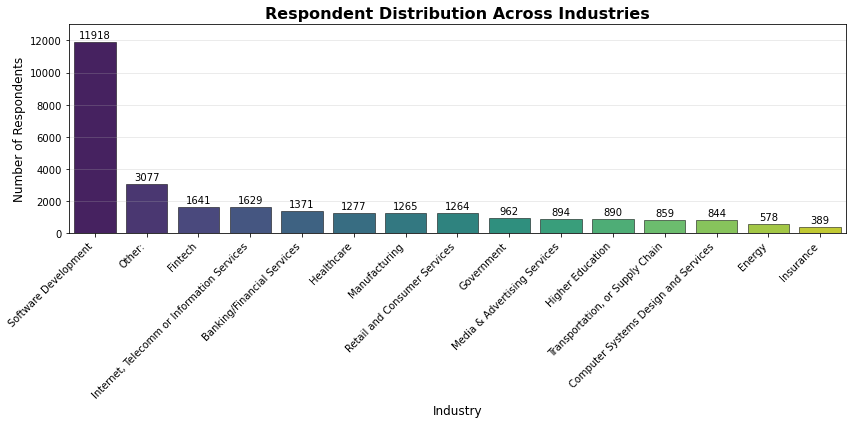

In [159]:
# print distribution counts
industry_counts = df_nonull['Industry'].value_counts()
print("\nRespondent counts by industry:\n", industry_counts)

# plot distribution
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", n_colors=len(industry_counts))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette=colors,edgecolor='black',linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.title("Respondent Distribution Across Industries", fontsize=16, fontweight='bold')
plt.ylabel("Number of Respondents", fontsize=12)
plt.xlabel("Industry", fontsize=12)
plt.ylim(0, 13000)


ax = plt.gca()
for i, v in enumerate(industry_counts.values):
    ax.text(i, v + max(industry_counts.values) * 0.01, str(v), 
            ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Remote Work Exploratory Analyses

### Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


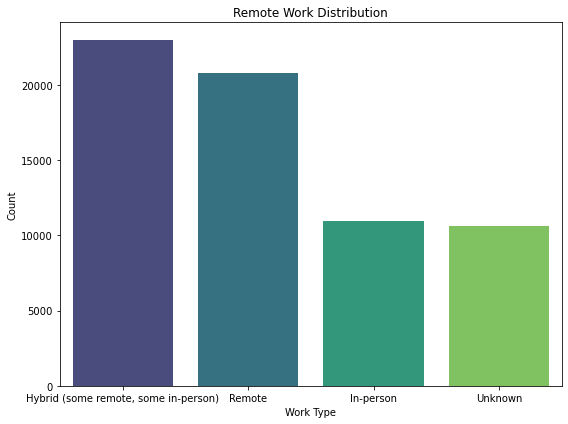

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                             0.442807   
Employed, full-time;Employed, part-time                                         0.400943   
Employed, full-time;Independent contractor, fre...                              0.373911   
Employed, full-time;Independent contractor, fre...                              0.434783   
Employed, full-time;Independent contractor, fre...                              0.000000   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                              0.500000   
Student, full-time;Not employed, but looking fo...                              0.400000   
Student, full-time;Not employed, but looking fo...                              

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_nonull, x='RemoteWork', order=df_nonull['RemoteWork'].value_counts().index, palette='viridis')
plt.title('Remote Work Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# cross-tabulation
remote_job_crosstab = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index')
print(remote_job_crosstab)

<Figure size 1008x576 with 0 Axes>

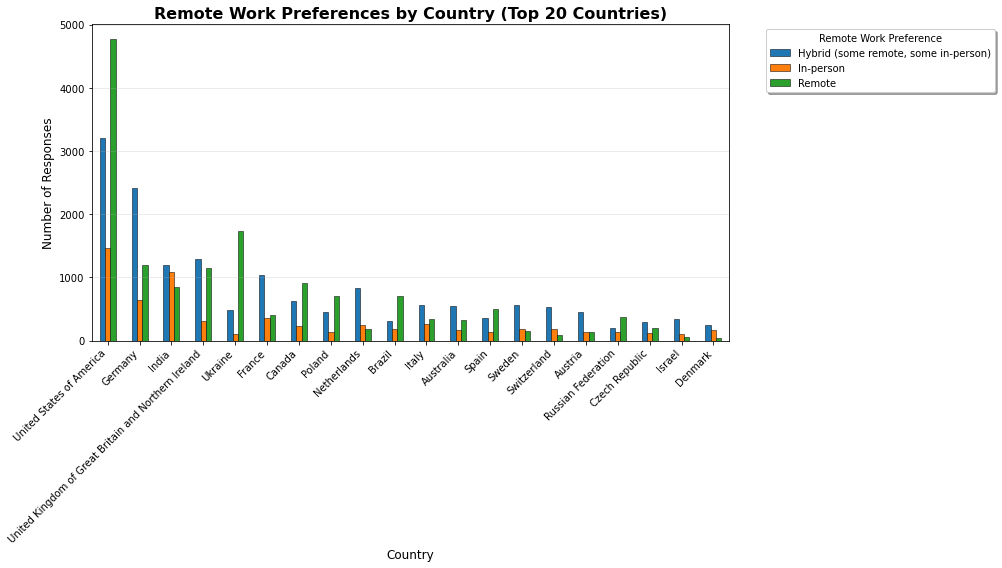

In [153]:
# data prep
remote_df = df[['RemoteWork', 'Country']].dropna()
remote_ct = pd.crosstab(remote_df['Country'], remote_df['RemoteWork'])

# keep only top 20 countries to avoid overcrowding
top_countries = remote_df['Country'].value_counts().head(20).index
remote_ct_top = remote_ct.loc[top_countries]

# grouped bar chart
plt.figure(figsize=(14, 8))
ax = remote_ct_top.plot(kind='bar', 
                        figsize=(14, 8),
                        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
                        edgecolor='black',
                        linewidth=0.5)

plt.title("Remote Work Preferences by Country (Top 20 Countries)", fontsize=16, fontweight='bold')
plt.ylabel("Number of Responses", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Preference', bbox_to_anchor=(1.05, 1), loc='upper left',frameon=True, shadow=True)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Programming Languages Exploratory Analyses

### Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


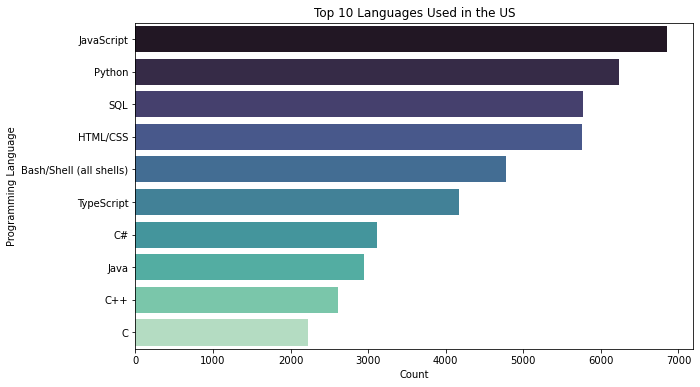

         Country LanguageHaveWorkedWith  Count
22   Afghanistan             JavaScript     25
36   Afghanistan                 Python     25
19   Afghanistan               HTML/CSS     24
40   Afghanistan                    SQL     21
32   Afghanistan                    PHP     15
73       Albania                    SQL     28
60       Albania             JavaScript     26
57       Albania               HTML/CSS     25
59       Albania                   Java     16
67       Albania                    PHP     16
94       Algeria             JavaScript     53
92       Algeria               HTML/CSS     52
103      Algeria                 Python     37
106      Algeria                    SQL     35
108      Algeria             TypeScript     32
128      Andorra                 Python      8
131      Andorra                    SQL      8
120      Andorra               HTML/CSS      7
122      Andorra             JavaScript      7
134      Andorra             TypeScript      7


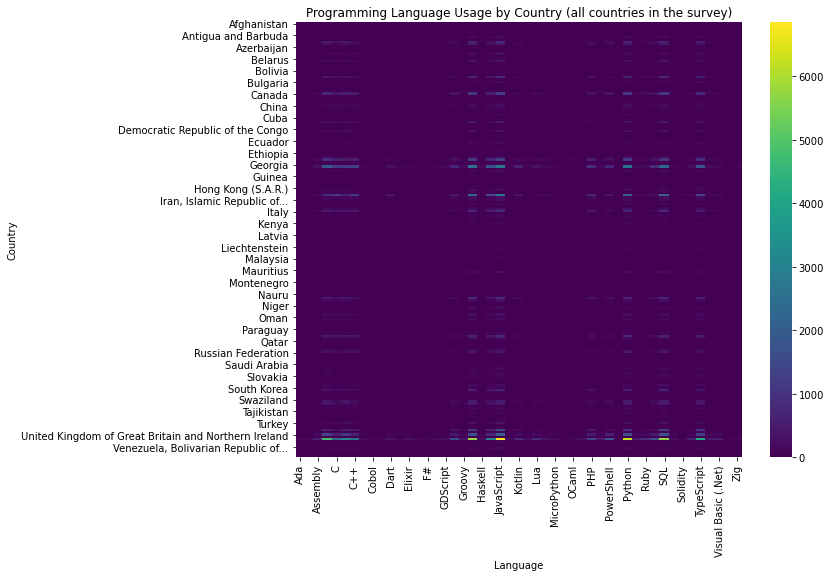

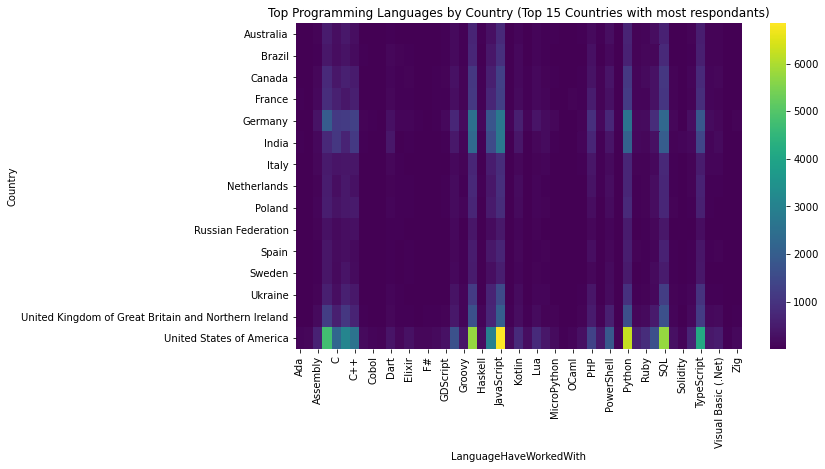

In [139]:
df_lang = df_nonull[['Country', 'LanguageHaveWorkedWith']].dropna()
# split languages into lists
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
# explode lists into rows (.explode() takes a list in a single cell and turns each item into a separate row)
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# (exploratory) top languages by country (example for US)
top_us = df_lang[df_lang['Country'] == 'United States of America']['LanguageHaveWorkedWith'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_us.values, y=top_us.index, palette='mako')
plt.title('Top 10 Languages Used in the US')
plt.xlabel('Count')
plt.ylabel('Programming Language')
plt.show()

# understand top languages in each unique region
# group by Country and Language and count
lang_counts = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# for each country, get top 5 languages
top_5 = 5

# create empty df
top_langs_by_country = []

# loop through unique regions and find top 5 languages, sotring results in new df
for country in lang_counts['Country'].unique():
    country_df = lang_counts[lang_counts['Country']==country]
    top_langs = country_df.nlargest(top_5, 'Count')
    top_langs_by_country.append(top_langs)

top_langs_by_country_df = pd.concat(top_langs_by_country)

print(top_langs_by_country_df.head(20))


heatmap_df = lang_counts.pivot_table(index='Country',columns='LanguageHaveWorkedWith',values='Count',fill_value=0)

# plot top 5 languages of every unique region
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap='viridis')
plt.title("Programming Language Usage by Country (all countries in the survey)")
plt.xlabel("Language")
plt.ylabel("Country")
plt.show()

### (for easier visualization) plot the top 5 languages of the 20 countries of responses
# count total responses per country
country_counts = df['Country'].value_counts()

# top 20 countries
top_countries = country_counts.head(15).index

lang_counts_top = lang_counts[lang_counts['Country'].isin(top_countries)]
heatmap_df_top = lang_counts_top.pivot_table(index='Country', columns='LanguageHaveWorkedWith',values='Count',fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df_top, annot=False, fmt='d', cmap='viridis')
plt.title("Top Programming Languages by Country (Top 15 Countries with most respondants)")
plt.show()

### Analyzing languages people have experiences with and those that people want to work with
- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.

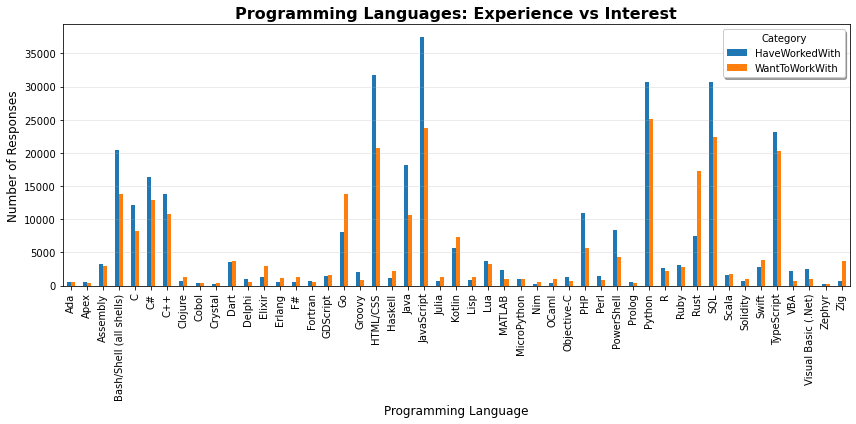

In [145]:
# prepare data
df_lang_worked = df_nonull[['LanguageHaveWorkedWith']].dropna()
df_lang_worked = df_lang_worked.assign(LanguageHaveWorkedWith=df_lang_worked['LanguageHaveWorkedWith'].str.split(';'))
df_lang_worked = df_lang_worked.explode('LanguageHaveWorkedWith')
lang_worked_counts = df_lang_worked['LanguageHaveWorkedWith'].value_counts()

df_lang_want = df_nonull[['LanguageWantToWorkWith']].dropna()
df_lang_want = df_lang_want.assign(LanguageWantToWorkWith=df_lang_want['LanguageWantToWorkWith'].str.split(';'))
df_lang_want = df_lang_want.explode('LanguageWantToWorkWith')
lang_want_counts = df_lang_want['LanguageWantToWorkWith'].value_counts()

# combine data
lang_df = pd.DataFrame({'HaveWorkedWith': lang_worked_counts, 'WantToWorkWith': lang_want_counts}).fillna(0)

lang_df.plot(kind='bar', figsize=(12,6))
plt.title('Programming Languages: Experience vs Interest', fontsize=16, fontweight='bold')
plt.ylabel('Number of Responses', fontsize=12)
plt.xlabel('Programming Language', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Category', frameon=True, shadow=True)
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Educational Background Exploratory Analyses

### Educational Background and Employment Type

Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [86]:
# reduce employment responses with the "most employed" option being taken
def simp_employment(x):
    if pd.isnull(x):
        return 'Other'
    elif 'Employed, full-time' in x:
        return 'Employed full-time'
    elif 'Employed, part-time' in x:
        return 'Employed part-time'
    elif 'Independent contractor' in x:
        return 'Contractor/Self-employed'
    elif 'Student' in x:
        return 'Student'
    elif 'Not employed' in x:
        return 'Unemployed'
    elif 'Retired' in x:
        return 'Retired'
    else:
        return 'Other'

df_nonull['Employment_Simple'] = df_nonull['Employment'].apply(simp_employment)
df_nonull.Employment_Simple

0        Employed full-time
1        Employed full-time
2        Employed full-time
3                   Student
4                   Student
                ...        
65432    Employed full-time
65433    Employed full-time
65434    Employed full-time
65435    Employed full-time
65436               Student
Name: Employment_Simple, Length: 65437, dtype: object

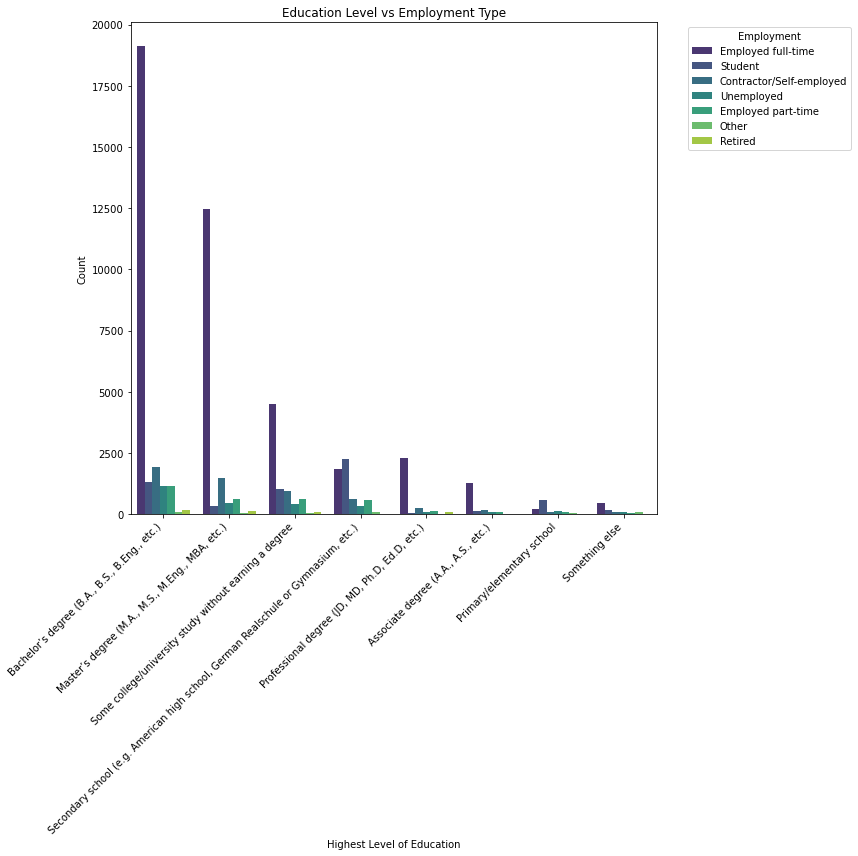

Employment_Simple                                   Contractor/Self-employed  \
EdLevel                                                                        
Associate degree (A.A., A.S., etc.)                                 0.101506   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                        0.078061   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                     0.095134   
Primary/elementary school                                           0.095986   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                      0.092929   
Secondary school (e.g. American high school, Ge...                  0.105990   
Some college/university study without earning a...                  0.124951   
Something else                                                      0.091202   

Employment_Simple                                   Employed full-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                

In [163]:
plt.figure(figsize=(12, 12))
sns.countplot(data=df_nonull, x='EdLevel', hue='Employment_Simple', palette='viridis', order=df_nonull['EdLevel'].value_counts().index)
plt.title('Education Level vs Employment Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('Highest Level of Education')
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# cross-tab
education_employment_ct = pd.crosstab(df_nonull['EdLevel'], df_nonull['Employment_Simple'], normalize='index')
print(education_employment_ct)

## Compensation Exploratory Analyses

### Identify High Compensation Outliers
Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for ConvertedCompYearly.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).

Compensation Stats:
Count: 23,435
Mean: $86155.28726264134
Median: $65000.0
Standard Deviation: $186756.9730862951
Minimum: $1.0
Maximum: $16256603.0
Q1 (25th percentile): $32712.0
Q3 (75th percentile): $107971.5
IQR: $75259.5

IQR boudns:
Lower bound (Q1 - 1.5*IQR): $-80,177.25
Upper bound (Q3 + 1.5*IQR): $220,860.75

IQR outlier analysis:
Total outliers: 978 (4.17%)
Lower outliers (below $-80,177.25): 0 (0.00%)
Upper outliers (above $220,860.75): 978 (4.17%)

Outlier Thresholds:
3 Standard Deviations above mean: $646,426.21
IQR method (Q3 + 1.5*IQR): $220,860.75
99th percentile: $393,751.06

Outlier counts:
Outliers (3 std above mean): 89 (0.38%)
Outliers (IQR method): 978 (4.17%)
Outliers (99th percentile): 235 (1.00%)

Top 10 compesnations:
 1. $16,256,603.00
 2. $13,818,022.00
 3. $9,000,000.00
 4. $6,340,564.00
 5. $4,936,778.00
 6. $3,367,716.00
 7. $2,584,118.00
 8. $2,237,846.00
 9. $2,153,432.00
10. $2,048,046.00


<Figure size 1080x720 with 0 Axes>

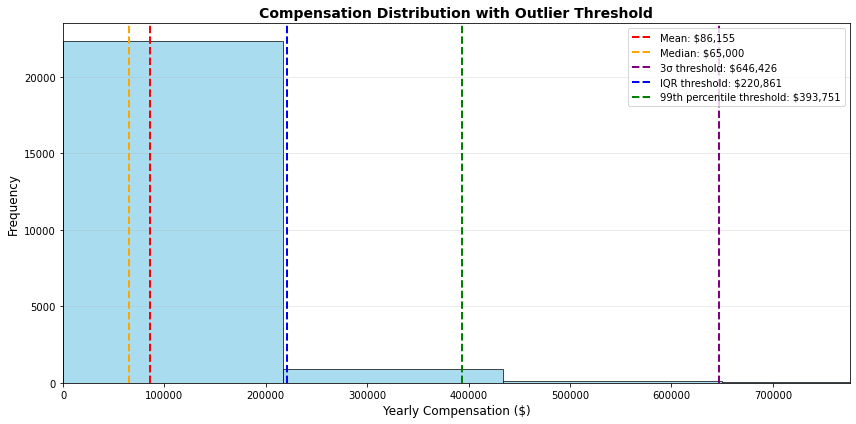

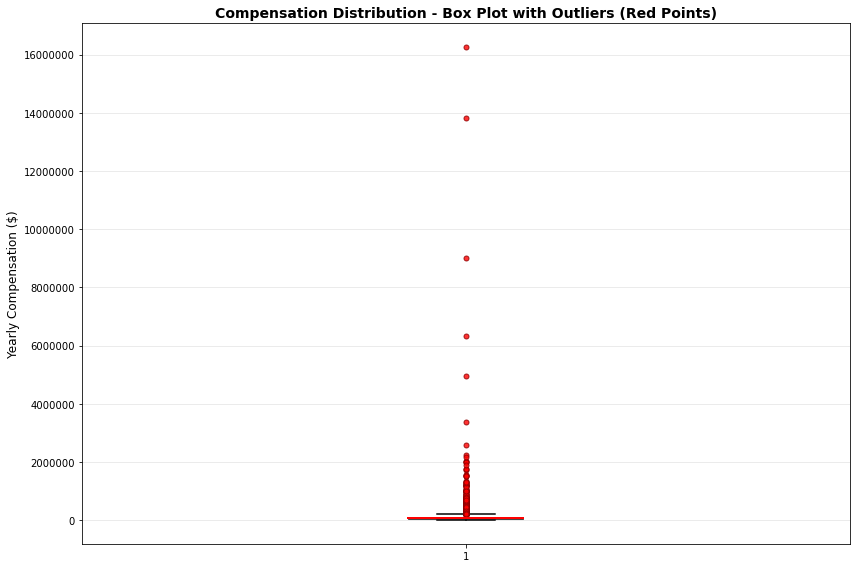

Clearly, this plot does not show our data well. Plot the data without the outliers


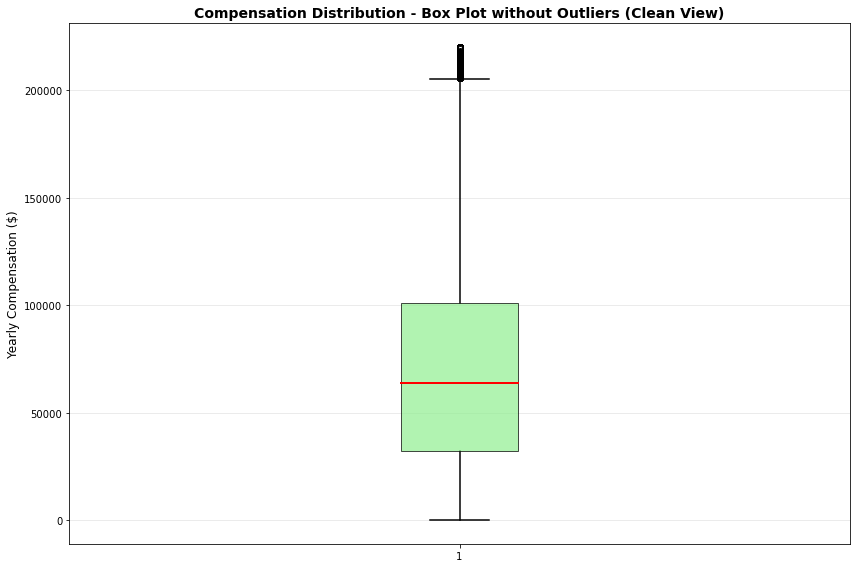

In [206]:
comp_data = df['ConvertedCompYearly'].dropna()

mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()
min_comp = comp_data.min()
max_comp = comp_data.max()
q1_comp = comp_data.quantile(0.25)
q3_comp = comp_data.quantile(0.75)
iqr_comp = q3_comp-q1_comp

print("Compensation Stats:")
print(f"Count: {len(comp_data):,}")
print(f"Mean: ${mean_comp:}")
print(f"Median: ${median_comp:}")
print(f"Standard Deviation: ${std_comp:}")
print(f"Minimum: ${min_comp:}")
print(f"Maximum: ${max_comp:}")
print(f"Q1 (25th percentile): ${q1_comp:}")
print(f"Q3 (75th percentile): ${q3_comp:}")
print(f"IQR: ${iqr_comp:}")

# IQR Method - define outlier bounds
lower_bound = q1_comp-1.5*iqr_comp
upper_bound = q3_comp+1.5*iqr_comp

print(f"\nIQR boudns:")
print(f"Lower bound (Q1 - 1.5*IQR): ${lower_bound:,.2f}")
print(f"Upper bound (Q3 + 1.5*IQR): ${upper_bound:,.2f}")

# identify outliers using IQR method
outliers_iqr = comp_data[(comp_data<lower_bound)|(comp_data>upper_bound)]
lower_outliers = comp_data[comp_data<lower_bound]
upper_outliers = comp_data[comp_data>upper_bound]

print(f"\nIQR outlier analysis:")
print(f"Total outliers: {len(outliers_iqr)} ({len(outliers_iqr)/len(comp_data)*100:.2f}%)")
print(f"Lower outliers (below ${lower_bound:,.2f}): {len(lower_outliers)} ({len(lower_outliers)/len(comp_data)*100:.2f}%)")
print(f"Upper outliers (above ${upper_bound:,.2f}): {len(upper_outliers)} ({len(upper_outliers)/len(comp_data)*100:.2f}%)")


# define outlier thresholds --- examine different threshold effects too
# 3 standard deviations above mean
threshold_3std = mean_comp+3*std_comp
# IQR method (1.5 * IQR above Q3)
threshold_iqr = q3_comp+1.5*iqr_comp
# 99th percentile
threshold_99p = comp_data.quantile(0.99)

print(f"\nOutlier Thresholds:")
print(f"3 Standard Deviations above mean: ${threshold_3std:,.2f}")
print(f"IQR method (Q3 + 1.5*IQR): ${threshold_iqr:,.2f}")
print(f"99th percentile: ${threshold_99p:,.2f}")

# identify outliers 
outliers_3std = comp_data[comp_data > threshold_3std]
outliers_iqr = comp_data[comp_data > threshold_iqr]
outliers_99p = comp_data[comp_data > threshold_99p]

print(f"\nOutlier counts:")
print(f"Outliers (3 std above mean): {len(outliers_3std)} ({len(outliers_3std)/len(comp_data)*100:.2f}%)")
print(f"Outliers (IQR method): {len(outliers_iqr)} ({len(outliers_iqr)/len(comp_data)*100:.2f}%)")
print(f"Outliers (99th percentile): {len(outliers_99p)} ({len(outliers_99p)/len(comp_data)*100:.2f}%)")

print(f"\nTop 10 compesnations:")
top_outliers = comp_data.nlargest(10)
for i, comp in enumerate(top_outliers, 1):
    print(f"{i:2d}. ${comp:,.2f}")


# visualize the distribution with outlier thresholds
plt.figure(figsize=(15, 10))


# histogram
plt.figure(figsize=(12, 6))
plt.hist(comp_data, bins=75, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_comp, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_comp:,.0f}')
plt.axvline(median_comp, color='orange', linestyle='--', linewidth=2, label=f'Median: ${median_comp:,.0f}')
plt.axvline(threshold_3std, color='purple', linestyle='--', linewidth=2, label=f'3σ threshold: ${threshold_3std:,.0f}')
plt.axvline(threshold_iqr, color='blue', linestyle='--', linewidth=2, label=f'IQR threshold: ${threshold_iqr:,.0f}')
plt.axvline(threshold_99p, color='green', linestyle='--', linewidth=2, label=f'99th percentile threshold: ${threshold_99p:,.0f}')
plt.xlabel('Yearly Compensation ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Compensation Distribution with Outlier Threshold', fontsize=14, fontweight='bold')
plt.legend()
plt.xlim(0, threshold_3std * 1.2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# box plot with all data
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot(comp_data, vert=True, patch_artist=True, 
                      boxprops=dict(facecolor='lightblue', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='black', linewidth=1.5),
                      capprops=dict(color='black', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.8, markeredgecolor='darkred'))

plt.ylabel('Yearly Compensation ($)', fontsize=12)
plt.title('Compensation Distribution - Box Plot with Outliers (Red Points)', fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print('Clearly, this plot does not show our data well. Plot the data without the outliers')

# box plot w/o outliers
normal_data = comp_data[(comp_data >= lower_bound) & (comp_data <= upper_bound)]

plt.figure(figsize=(12, 8))
box_plot_clean = plt.boxplot(normal_data, vert=True, patch_artist=True, 
                            boxprops=dict(facecolor='lightgreen', alpha=0.7),
                            medianprops=dict(color='red', linewidth=2),
                            whiskerprops=dict(color='black', linewidth=1.5),
                            capprops=dict(color='black', linewidth=1.5))

plt.ylabel('Yearly Compensation ($)', fontsize=12)
plt.title('Compensation Distribution - Box Plot without Outliers (Clean View)', fontsize=14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



### Create new df without outliers

In [190]:
# use boolean mask
mask_keep = df['ConvertedCompYearly'].isna()|((df['ConvertedCompYearly'] >= lower_bound)&(df['ConvertedCompYearly'] <= upper_bound))
df_no_outliers = df[mask_keep].copy()
print('new max =', df_no_outliers['ConvertedCompYearly'].max())
print('Upper bound =', upper_bound)
print(df_no_outliers.shape)

new max = 220207.0
Upper bound = 220860.75
(64459, 115)


### Median Compensation for Full-Time Employees
Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."

In [196]:
# filter for full-time employees
fulltime_employees = df_nonull[df_nonull['Employment']=='Employed, full-time']
median_compensation = fulltime_employees['ConvertedCompYearly'].median()
print(f"Median compensation for full-time employees: ${median_compensation:}")

Median compensation for full-time employees: $69814.0


### Analyze the Compensation Range and Distribution by Country
Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. 
- Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.

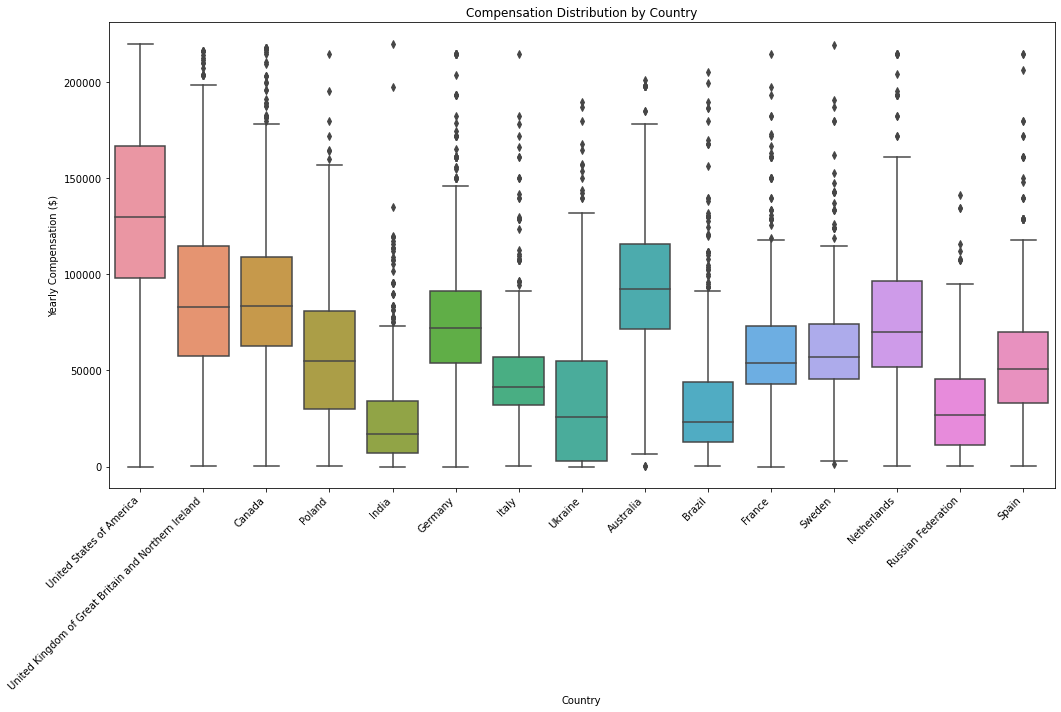

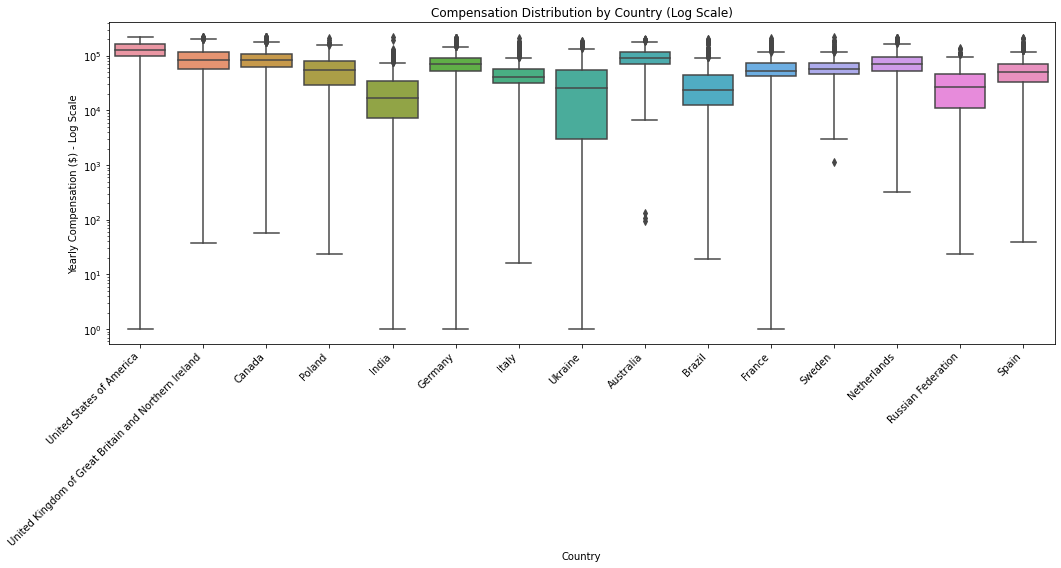

Compensation statistics by country:
                                                      median       mean  count
Country                                                                       
United States of America                            130000.0  130208.15   3990
Australia                                            92492.0   94723.58    498
Canada                                               83597.0   90088.50    838
United Kingdom of Great Britain and Northern Ir...   82802.0   89405.38   1326
Germany                                              71962.0   73261.87   2021
Netherlands                                          69814.0   78445.46    552
Sweden                                               57230.0   62341.70    452
Poland                                               55061.0   59201.69    582
France                                               53703.0   60076.21    909
Spain                                                50615.0   56365.46    555
Italy           

In [208]:
# NO OUTLIERS INCLUDED
# look at just top 15 countries to avoid overcrowding on the plots
country_counts = df_no_outliers['Country'].value_counts().head(15)
top_countries = country_counts.index.tolist()

# filter data for those in top 15 countries
country_data = df_no_outliers[df_no_outliers['Country'].isin(top_countries)]

# box plot by country
plt.figure(figsize=(15, 10))
sns.boxplot(data=country_data, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.title('Compensation Distribution by Country')
plt.ylabel('Yearly Compensation ($)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

# box plot with log scale for full range
plt.figure(figsize=(15, 8))
sns.boxplot(data=country_data, x='Country', y='ConvertedCompYearly')
plt.xticks(rotation=45, ha='right')
plt.title('Compensation Distribution by Country (Log Scale)')
plt.ylabel('Yearly Compensation ($) - Log Scale')
plt.xlabel('Country')
plt.yscale('log')
plt.tight_layout()
plt.show()

# Summary statistics by country
country_stats = country_data.groupby('Country')['ConvertedCompYearly'].agg(['median', 'mean', 'count']).round(2)
print("Compensation statistics by country:")
print(country_stats.sort_values('median', ascending=False))

### Find correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1 
- Visualize these correlations with a heatmap
- Provides us with an idea of how work experience and job satisfaction are associated with salary

Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.408438       -0.058170
WorkExp                         0.408438  1.000000       -0.028027
JobSatPoints_1                 -0.058170 -0.028027        1.000000


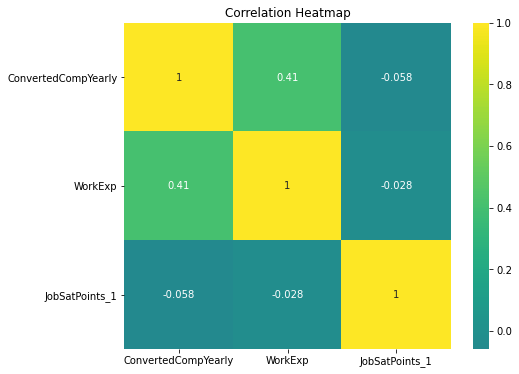

In [209]:
variables = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# calculate correlations between the variables
comp_corr_matrix = df_no_outliers[variables].corr()

# show correlation matrix
print("Correlation Matrix:")
print(comp_corr_matrix)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(comp_corr_matrix, annot=True, cmap='viridis', center=0, square=True)

plt.title('Correlation Heatmap')
plt.show()

### Visualize relationship between ConvertedCompYearly and WorkExp with a scatterplot

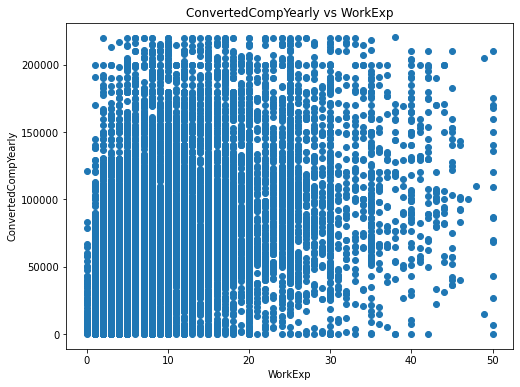

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['WorkExp'], df_no_outliers['ConvertedCompYearly'])
plt.xlabel('WorkExp')
plt.ylabel('ConvertedCompYearly')
plt.title('ConvertedCompYearly vs WorkExp')
plt.show()

### Visualize relationship between ConvertedCompYearly and JobSatPoints_1 with a scatterplot

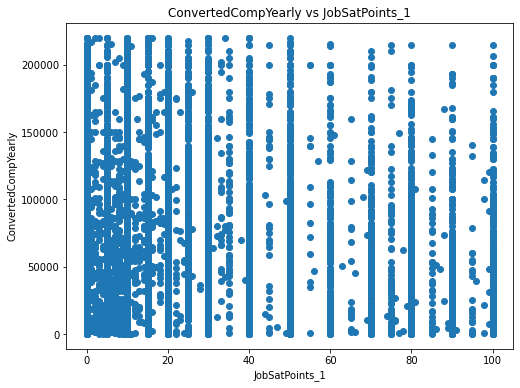

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['JobSatPoints_1'], df_no_outliers['ConvertedCompYearly'])
plt.xlabel('JobSatPoints_1')
plt.ylabel('ConvertedCompYearly')
plt.title('ConvertedCompYearly vs JobSatPoints_1')
plt.show()

In [205]:
# the correlations shown in the matrix may be driven by outliers

## Correlation Matrix for Age and all other Variables

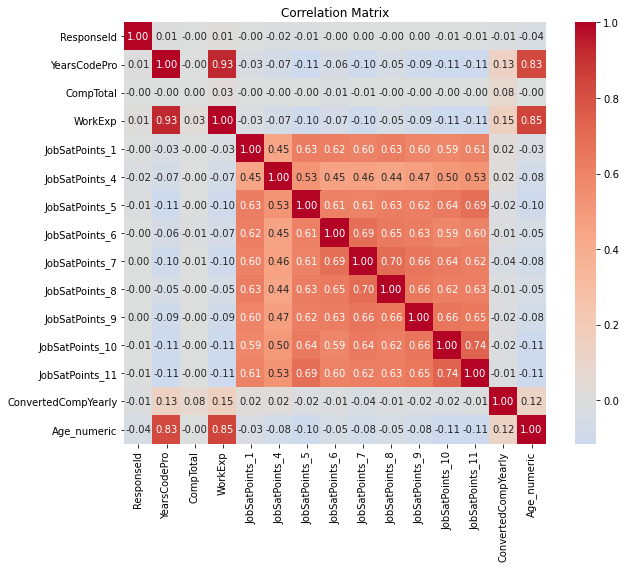

Age correlations:
Age_numeric            1.000000
WorkExp                0.849853
YearsCodePro           0.829246
ConvertedCompYearly    0.122102
CompTotal             -0.002776
JobSatPoints_1        -0.027890
ResponseId            -0.038094
JobSatPoints_8        -0.046469
JobSatPoints_6        -0.050635
JobSatPoints_4        -0.076129
JobSatPoints_9        -0.082146
JobSatPoints_7        -0.083282
JobSatPoints_5        -0.101785
JobSatPoints_11       -0.107317
JobSatPoints_10       -0.114731
Name: Age_numeric, dtype: float64


In [191]:
# map `Age` to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 65
}

df_nonull['Age_numeric'] = df_nonull['Age'].map(age_mapping)

# get numeric columns
numeric_cols = df_nonull.select_dtypes(include=['number']).columns

# calculate correlation matrix for age and numeric columns
age_corr_matrix = df_nonull[numeric_cols].corr()

# visualzie with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(age_corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# print correlations in text format
age_correlations = age_corr_matrix['Age_numeric'].sort_values(ascending=False)
print("Age correlations:")
print(age_correlations)

# older age strongly correlated with experience and years coding, both of which make sense!

## Save the Cleaned and Analyzed Dataset

In [ ]:
df_nonull.to_csv('cleaned_stackoverflow_data.csv', index=False)
df_no_outliers.to_csv('cleaned_stackoverflow_data_no_outliers.csv', index=False)

Copyright © IBM Corporation. All rights reserved.
